### CNN Training in Frequency Domain

In [1]:
import preprocessor.frequency_preprocessor as preprocessor
X_train, y_train, X_val, y_val, X_test, y_test = preprocessor.preprocess()
print(X_train.shape)

Reading: ./data/chb13/chb13_55.edf
Reading: ./data/chb06/chb06_04.edf
Reading: ./data/chb22/chb22_25.edf
Reading: ./data/chb14/chb14_11.edf
Reading: ./data/chb12/chb12_06.edf
Reading: ./data/chb12/chb12_10.edf
Reading: ./data/chb04/chb04_05.edf
Reading: ./data/chb12/chb12_09.edf
Reading: ./data/chb21/chb21_20.edf
Reading: ./data/chb03/chb03_35.edf
Reading: ./data/chb01/chb01_15.edf
Reading: ./data/chb23/chb23_06.edf
Reading: ./data/chb06/chb06_10.edf
Reading: ./data/chb21/chb21_19.edf
Reading: ./data/chb18/chb18_32.edf
Reading: ./data/chb18/chb18_35.edf
Reading: ./data/chb04/chb04_08.edf
Reading: ./data/chb23/chb23_09.edf
Reading: ./data/chb06/chb06_18.edf
Reading: ./data/chb03/chb03_36.edf
Effective window size : 5.004 (s)
Effective window size : 5.004 (s)
Effective window size : 5.004 (s)
Effective window size : 5.004 (s)
Effective window size : 5.004 (s)
Effective window size : 5.004 (s)
Effective window size : 5.004 (s)
Effective window size : 5.004 (s)
Effective window size : 5.00

c:\Users\luiza\Desktop\Mestrado\Trabalho\reader\reader.py:32: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  mne_model = mne.io.read_raw_edf(summary_model.fullpath(),


Reading: ./data/chb23/chb23_08.edf
Reading: ./data/chb13/chb13_19.edf
Reading: ./data/chb07/chb07_13.edf
Reading: ./data/chb10/chb10_38.edf
Reading:Reading: ./data/chb08/chb08_13.edf
 ./data/chb15/chb15_06.edf
Reading: ./data/chb06/chb06_13.edf
Reading: ./data/chb13/chb13_60.edf
Reading: ./data/chb11/chb11_82.edf
Reading: ./data/chb15/chb15_10.edf
Reading: ./data/chb21/chb21_22.edf
Reading: ./data/chb05/chb05_13.edf
Reading: ./data/chb08/chb08_02.edf
Reading: ./data/chb16/chb16_18.edf
Reading: ./data/chb15/chb15_20.edf
Reading: ./data/chb13/chb13_21.edf
Reading: ./data/chb16/chb16_16.edf
Reading: ./data/chb19/chb19_29.edf
Reading: ./data/chb22/chb22_38.edf
Reading: ./data/chb15/chb15_54.edf
Reading: ./data/chb08/chb08_05.edf
Reading: ./data/chb16/chb16_17.edf
Reading: ./data/chb15/chb15_46.edf
Reading: ./data/chb01/chb01_21.edf
Reading: ./data/chb10/chb10_30.edf
Reading: ./data/chb15/chb15_22.edf
Reading: ./data/chb14/chb14_27.edf
Reading: ./data/chb14/chb14_03.edf
Reading: ./data/chb0

Load CNN model

In [2]:
from ia.model.cnn.frequency_cnn import FrequencyCNN
frequency_cnn = FrequencyCNN(input_shape=(X_train[0].shape))

In [3]:
frequency_cnn.compile()

In [4]:
NR_EPOCHS = 100
BATCH_SIZE = 250

In [5]:
history = frequency_cnn.fit(X_train, y_train, num_epochs=NR_EPOCHS, batch_size=BATCH_SIZE, val_data=X_val, val_labels=y_val)

Epoch 1/100
16/16 [==============================] - 1s 28ms/step - loss: 0.6160 - accuracy: 0.6987 - val_loss: 0.6735 - val_accuracy: 0.6524
Epoch 2/100
16/16 [==============================] - 0s 16ms/step - loss: 0.4879 - accuracy: 0.7814 - val_loss: 0.6524 - val_accuracy: 0.7301
Epoch 3/100
16/16 [==============================] - 0s 16ms/step - loss: 0.4281 - accuracy: 0.8083 - val_loss: 0.6519 - val_accuracy: 0.7221
Epoch 4/100
16/16 [==============================] - 0s 16ms/step - loss: 0.3673 - accuracy: 0.8478 - val_loss: 0.6539 - val_accuracy: 0.7390
Epoch 5/100
16/16 [==============================] - 0s 16ms/step - loss: 0.3180 - accuracy: 0.8677 - val_loss: 0.6536 - val_accuracy: 0.7281
Epoch 6/100
16/16 [==============================] - 0s 17ms/step - loss: 0.2572 - accuracy: 0.9025 - val_loss: 0.6542 - val_accuracy: 0.6474
Epoch 7/100
16/16 [==============================] - 0s 18ms/step - loss: 0.2055 - accuracy: 0.9302 - val_loss: 0.6454 - val_accuracy: 0.6633
Epoch 

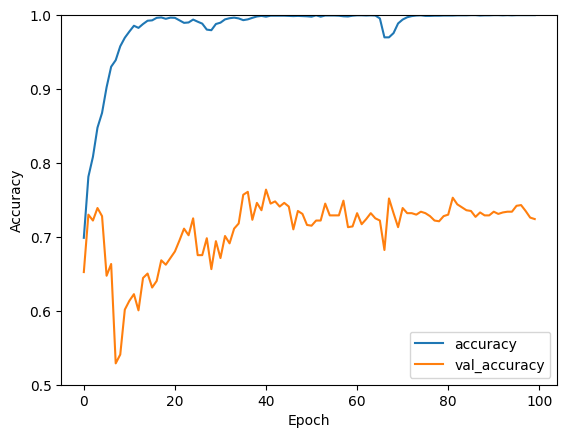

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [7]:
frequency_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 16, 32)            61568     
                                                                 
 max_pooling1d (MaxPooling1  (None, 5, 32)             0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 5, 32)             128       
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 64)             6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                        

In [8]:
import numpy as np
predictions = frequency_cnn.model.predict(X_test)
predictions = np.array([prediction > 0.5 for prediction in predictions])

for i in range(len(y_test)):
    print("PREDICTION: " + str(predictions[i] > 0.5) + " | " +  "REAL: " + str(y_test[i]))

10/10 [==============================] - 0s 2ms/step
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: True
PREDICTION: [False] | REAL: True
PREDICTION: [False] | REAL: True
PREDICTION: [False] | REAL: True
PREDICTION: [False] | REAL: True
PREDICTION: [ True] | REAL: True
PREDICTION: [ True] | REAL: True
PREDICTION: [False] | REAL: True
PREDICTION: [False] | REAL: True
PREDICTION: [False] | REAL: True
PREDICTION: [False] | REAL: True
PREDICTION: [False] | REAL: True
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICT

In [9]:
test_loss, test_acc = frequency_cnn.model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

10/10 [==============================] - 0s 1ms/step - loss: 1.4373 - accuracy: 0.7898
Test accuracy: 0.7898089289665222
Test loss: 1.4372742176055908


### Metrics:

In [10]:
from ia.metrics.metrics import Metrics
metrics = Metrics(y_test, predictions, frequency_cnn.name(), "frequency")
metrics.all_metrics()

True Positives: 67
True Negatives: 181
False Positives: 43
False Negatives: 23
total Samples: 314
Accuracy: 0.7898089171974523
Precision: 0.6090909090909091
Sensitivity: 0.7444444444444445
Specificity: 0.8080357142857143
TPR: 0.6090909090909091
FPR: 0.19196428571428573
F1-Score: 0.7664560173439735


ROC curve

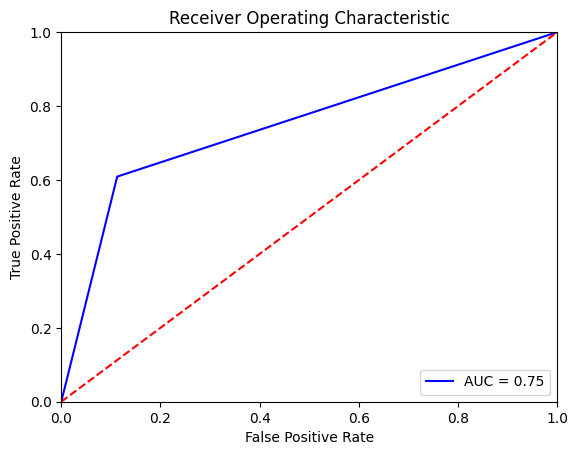

In [11]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()